In [1]:
from textrazor import TextRazor
import re
import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:


phraseDict1 ={'Manfred von Richthofen' : ['Manfred von Richthofen'],
'Roy Brown (RAF officer)' : ['Roy Brown (RAF officer)'],
'Military' : ['Synchronization gear', 'Fighter aircraft', 'Military', 'Military forces', 'Military aviation', 'Military science', 'Aviation', 'Sopwith Camel', 'Aeronautics', 'Aircraft', 'Bloody April', 'Military operations', 'Conflicts', 'Luftstreitkräfte', 'Triplane', 'Artillery', 'Propeller', 'Reconnaissance', 'Military technology'],
'War' : ['Warfare', 'War', 'World War I', 'Dogfight', 'Flying ace', 'Trench warfare', 'Airplane', 'Combat', 'Aerospace engineering', 'Cavalry', 'Air force'],
'Jagdgeschwader 1 (World War I)' : ['Jagdgeschwader 1 (World War I)'],
'International security' : ['International security', 'National security'],
'Anthony Fokker' : ['Anthony Fokker', 'Fokker Dr.I'],
'Roland Georges Garros' : ['Roland Georges Garros'],
'Violent conflict' : ['Violent conflict'],
'Nazi Germany' : ['Nazi Germany'],
'Royal Aircraft Factory S.E.5' : ['Royal Aircraft Factory S.E.5'],
'Allies of World War II' : ['Allies of World War II']}


#{'Roy Brown (RAF officer)' : ['Roy Brown (RAF officer)'], 
#'Military' : ['Manfred von Richthofen', 'Synchronization gear', 'Fighter aircraft', 'Military forces', 'Warfare', 'Military science', 'Military aviation', 'Military', 'Aviation', 'Sopwith Camel', 'Flying ace', 'Jagdgeschwader 1 (World War I)', 'Cedric Popkin', 'World War I', 'Dogfight', 'War', 'Trench warfare', 'International security', 'Airplane', 'Anthony Fokker', 'Bloody April', 'Roland Georges Garros', 'Fokker Dr.I', 'Aeronautics', 'Combat', 'Nazi Germany', 'Cavalry', 'Air force', 'Aircraft', 'Violent conflict', 'National security', 'Artillery', 'Luftstreitkräfte', 'Aerospace engineering', 'Triplane', 'Propeller', 'Royal Air Force', 'Sopwith Aviation Company', 'Reconnaissance'],
#'Allies of World War II' : ['Allies of World War II'],
#'Royal Aircraft Factory S.E.5' : ['Royal Aircraft Factory S.E.5']}
#phraseDict = 
#{'Jagdstaffel': ['Oswald Boelcke', 'Jagdstaffel', 'Jagdgeschwader 1 (World War I)', 'Dogfight', 'Bloody April', 'Synchronization gear', 'Aviation', 'World War I', 'Sopwith Camel', 'Fokker Dr.I', 'Max Immelmann', 'Anthony Fokker', 'Jagdstaffel 2', 'Cavalry', 'National security', 'Triplane', 'Aerial warfare', 'Jagdstaffel 11', 'Conflicts', 'Reconnaissance'], 
#'Air forces': ['Air forces', 'Air force', 'Royal Air Force'], 
#'No. 209 Squadron RAF': ['No. 209 Squadron RAF'], 
#'Military': ['Manfred von Richthofen', 'Fighter aircraft', 'Luftstreitkräfte', 'Cedric Popkin', 'Flying ace', 'Military', 'Military science', 'Military forces', 'Warfare', 'Military aviation', 'War', 'Aeronautics', 'Trench warfare', 'Aircraft', 'International security', 'Sopwith Aviation Company', 'Lanoe Hawker', 'Airplane', 'Aerospace engineering', 'Combat', 'Royal Flying Corps', 'Military organization', 'Violent conflict', 'Military operations'], 
#'Imperial German Army Air Service': ['Imperial German Army Air Service'], 
#'Roy Brown (RAF officer)': ['Roy Brown (RAF officer)']}

In [20]:
## Functions Definitions ##

def get_top_relevant_topics(response, thresh_score):
    top_relevant_topics = []
    topics = []
    topics = response.topics()
    top_relevant_topics = [topic for topic in topics if topic.score > thresh_score]

    return top_relevant_topics

In [ ]:
#df = pd.DataFrame(index=phraseDict, columns=range(1,len(sentences)+1))
#df = df.fillna(0) # with 0s rather than NaNs

In [22]:
#Window function
from itertools import islice

def window(seq, n=4):
    if len(seq)<n:
        yield seq
    #"Returns a sliding window (of width n) over data from the iterable"
    #"   s -> (s0,s1,...s[n-1]), (s1,s2,...,sn), ...                   "
    it = iter(seq)
    result = tuple(islice(it, n))
    if len(result) == n:
        yield result    
    for elem in it:
        result = result[1:] + (elem,)
        yield result

result = []
input = 'Hello my name is Steven'
for item in input.split():
    result.extend(list(window(item)))

result = map(lambda x: ''.join(x), result)
print(list(result))

['Hell', 'ello', 'my', 'name', 'is', 'Stev', 'teve', 'even']


In [23]:
#Splitting input file by number of words
def splitter(n, s):
    pieces = s.split()
    str = (" ".join(pieces[i:i+n]) for i in range(0, len(pieces), n))
    return list(str)


In [24]:
def buildArray(txtFile, clusterdict,windowsize):
    ####################Done once##############################################################################
    import winsound
    duration = 2000  # millisecond
    freq = 440  # Hz
    import math
    import csv
    from textrazor import TextRazorAnalysisException
    from urllib.error import HTTPError
    inFile = open(txtFile, encoding='utf8').read()
    #For clean data
    ##############################################################
    #tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    #sentences = tokenizer.tokenize(inFile)
    ##############################################################
    ##############################################################

    #For noisy data
    ##############################################################
    #sentences = inFile.split('\n')
    ##############################################################
    
    #For splitting by number of words
    ##############################################################
    sentences = splitter(20, inFile)
    ##############################################################
    
    num_columns = math.ceil(len(sentences)/windowsize) + 1
    df = pd.DataFrame(index=clusterdict, columns=range(1,num_columns))
    df = df.fillna(0)
    
    
    sentence_num=1
    no_cluster_dict = {}
    textrazor_key = "324337f35ea1876aae377a6f1191ab5a5b9aaced32f9a4e3634e74c5"
    #"190e8d56b61fb29f96c350d20a2947dc96218eba2bae86f7f17b212d"
    #"eb2a5954577a28b1ba8a97005281289493eee48179d2ac1883b685e6"
    #"5fdb0f64097c21849b8a9345fd8df3df5730ecfca4ab1c4e01a285b0"
    ###########################################################################################################
    
    for i in range(0,len(sentences),windowsize):
        #while i in range(0,len(sentences),windowsize):
        try:
            print("i = ", i)
            client = TextRazor(textrazor_key, extractors=["topics"])
            row=0
            sentence = str(sentences[i:i+windowsize])
            print(i , sentence)
            topicDict = {}
            response = client.analyze(sentence)
            topics = get_top_relevant_topics(response, 0)
            cluster_val = 0
            for topic in topics:
                print(" ", topic.label, topic.score)
                topicDict.update({topic.label: topic.score})
            for key in clusterdict:
                print('Phrase Number =',row)
                phrase = clusterdict.get(key)
                print(clusterdict.get(key))
                val = 0
                
                sumProb = 0
                numMatch = 0
                for topicKey in topicDict:
                    sumProb += topicDict.get(topicKey)
                    #print('Topic Number = ',j)
                    #print(topicKey, topicDict.get(topicKey))
                    if topicKey in phrase:
                        print(topicKey, topicDict.get(topicKey))
                        val += topicDict.get(topicKey)
                        numMatch +=1
                print('val =', val)
                print('row =', row, 'sentence_num =', sentence_num)
                if numMatch!=0:
                    df[sentence_num].iloc[row] = val/numMatch
                else:
                    df[sentence_num].iloc[row] = val/1
                cluster_val += val
                row+= 1
            if cluster_val == 0:
                no_cluster_dict.update({sentence_num: topicDict})
            sentence_num += 1

        except (HTTPError, TextRazorAnalysisException) as e:
            
            winsound.MessageBeep(0)
            print("Error on " ,textrazor_key)
            textrazor_key = "49bb9fee0d6262d1f107bf5e9b35078fc0e5327a2d019bbaa908c442"
            print("i = ", i)
            #i = i - windowsize
            #print("i = ", i)
            print(e)
            continue
    df_csv_file = 'output_ws'+str(windowsize)+ '.csv'
    no_cluster_csv_file = 'no_cluster_dict_ws'+str(windowsize)+ '.csv'
    print("Output files:", df_csv_file, no_cluster_csv_file)
    df.to_csv(df_csv_file)
    with open(no_cluster_csv_file, 'w') as csv_file:
        writer_dict = csv.writer(csv_file)
        for key, value in no_cluster_dict.items():
            writer_dict.writerow([key, value])
    winsound.Beep(freq, duration)
    return df
            
        
    

In [25]:
def hardMax(df):
    df_max = pd.DataFrame(0, columns=df.columns, index=df.index)

    for column in df_max:
        index = df[column].idxmax()
        if df.loc[index,column]!=0:
            df_max.loc[index,column] = 1
    return df_max
    


## Plot facet plots and hardmax plots for windowsizes 1 to 10

In [49]:
winsize

3

In [48]:
winsize = 3

In [50]:
my_df_array = buildArray("redbarron_rashmi.txt", phraseDict1, winsize)

i =  0
0 ['April 20th 1918 in the Skies over northern France Allied and German fighter aircraft a locked in a ferocious dog', 'fight one of the contenders in this aerial battle is the legendary German Ace Manfred von Richthofen the Red Baron', 'is distinctive red Fokker triplane is in Hot Pursuit Of The Sun Valley and its sights are two British Sopwith']
  Manfred von Richthofen 1
  World War I 1
  Military 1
  Aviation 1
  Military aviation 1
  Aircraft 1
  Aeronautics 0.956
  Warfare 0.9035
  Military aircraft 0.8798
  Military forces 0.867
  War 0.8605
  Military science 0.7531
  Military equipment of World War I 0.7326
  Aircraft configurations 0.726
  Wing configurations 0.7182
  Richthofen family 0.6743
  Combat 0.6564
  Aerial warfare 0.6441
  Aircraft wing design 0.6346
  Aerospace engineering 0.6316
  German World War I flying aces 0.6262
  Imperial German Army Air Service 0.6035
  Military aircraft of World War I 0.5795
  German World War I pilots 0.5782
  Vehicle design 0.57

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


1
  War 1
  World War I 1
  Military of Germany 1
  World Wars 1
  Military 1
  Global conflicts 1
  Military of the United Kingdom 0.9838
  Battles 0.9335
  Military science 0.9081
  Military operations of World War I 0.844
  Combat 0.8214
  Military of France 0.7872
  International relations 0.7863
  Violent conflict 0.7844
  Battles of World War I 0.763
  Military operations of the Industrial era 0.6445
  Campaigns and theatres of World War I 0.5964
  Chronology of war 0.5956
  International security 0.5922
  Former republics 0.5724
  Western Front (World War I) 0.5493
  Man-made disasters 0.5283
  Human rights abuses 0.523
  Battles of the Western Front (World War I) 0.5107
  Foreign relations of the Ottoman Empire 0.5045
  Battles of the European Theatre (World War I) 0.4789
  Invasions 0.4753
  Military of Australia 0.4722
  European theatre of World War I 0.4494
  Hazards 0.425
  National security 0.4207
  Politics 0.4173
  Russia–Turkey military relations 0.4143
  French Third 

  Human rights abuses 0.5017
  Hazards 0.5015
  Military of Australia 0.49
  Eastern European theatre of World War II 0.4891
  Artillery 0.4673
  Military aviation 0.3999
  Military organization 0.391
  Military geography 0.3876
  Conflict (process) 0.3854
  Germany–Soviet Union relations 0.364
  Former republics 0.3629
  Machine gun 0.3581
  Military intelligence 0.3576
  Germany 0.3413
  World War II operations of the Western European Theatre 0.3363
  Defense 0.336
  Campaigns 0.3314
  Battles and operations of the Eastern Front of World War II 0.3314
  Battles and operations of the Soviet–German War 0.3247
  Government of Germany 0.3231
  Southeastern Europe 0.2892
  Aerial warfare 0.2864
  Military technology 0.2823
  World War II invasions 0.2782
  French Third Republic 0.2775
  Invasions 0.2723
  September events 0.2674
  Security 0.2671
  Aviation 0.2656
  Military of New Zealand 0.2641
  World War II operations and battles of the Western European Theatre 0.2602
  Military of th

  Aircraft 1
  Aeronautics 1
  Military aviation 1
  Aerospace engineering 1
  Aircraft configurations 0.9365
  Military science 0.9194
  Military 0.8606
  Warfare 0.8605
  Vehicles 0.8579
  Military aircraft 0.8194
  Industries 0.7787
  Artificial objects 0.7548
  Military forces 0.7375
  Vehicle design 0.7035
  War 0.651
  Wing configurations 0.5922
  Aerial warfare 0.5756
  Monoplanes 0.5555
  Fighter aircraft 0.5232
  Technology 0.5167
  Manufactured goods 0.5013
  Airplane 0.5009
  Single-engine aircraft 0.4935
  Propeller aircraft 0.4903
  Tractor aircraft 0.4892
  Military technology 0.4704
  Conflicts 0.4661
  Aircraft wing design 0.4476
  Military operations 0.4371
  Transport 0.3993
  Military equipment 0.3919
  Global conflicts 0.3909
  Single-engined tractor aircraft 0.3751
  Aerospace 0.369
  Low-wing aircraft 0.3564
  Aerial operations and battles 0.3471
  World War II 0.3443
  Wars 0.3434
  International security 0.3352
  Battles 0.3328
  Air forces 0.3142
  Warfare of t

  War 1
  Military operations 1
  Military 1
  Conflicts 1
  Wars 1
  Warfare of the Industrial era 1
  2nd-millennium conflicts 1
  Battles 1
  Military of Germany 1
  World Wars 0.9765
  Military operations of World War I 0.9451
  International relations 0.9372
  Military operations of the Industrial era 0.9203
  Battles of World War I 0.8917
  Military of the United Kingdom 0.8845
  Campaigns and theatres of World War I 0.8694
  International security 0.8483
  Western Front (World War I) 0.8322
  Battles of the Western Front (World War I) 0.7926
  Violent conflict 0.7866
  World War II 0.771
  Battles of the European Theatre (World War I) 0.7414
  European theatre of World War I 0.7122
  National security 0.7013
  Chronology of war 0.6926
  Battles and operations of World War II 0.6836
  Human rights abuses 0.6581
  Military of France 0.628
  Manfred von Richthofen 0.6243
  European theatre of World War II 0.5929
  Western European theatre of World War II 0.5531
  Man-made disasters

  Military equipment 0.3948
  Military aircraft of World War I 0.3874
  Military operations of the Industrial era 0.3641
  Vehicle design 0.3573
  Military of Australia 0.3361
  Royal Air Force 0.3335
  Human rights abuses 0.3322
  European theatre of World War II 0.3193
  Allies of World War II 0.3137
  Military operations of World War I 0.3125
  Battles of World War I 0.3041
  Pacific theatre of World War II 0.3013
  Tractor aircraft 0.2944
  Single-engine aircraft 0.2929
  Hazards 0.2911
  Pacific Ocean theatre of World War II 0.287
  Military organization 0.2859
  Sopwith aircraft 0.2816
  Lieutenant 0.2796
  Military of the United States 0.271
  Single-engined tractor aircraft 0.2626
  United Kingdom 0.2609
  Multiplane aircraft 0.2607
  Politics of World War II 0.2592
  Propeller aircraft 0.257
  Foreign relations of Germany 0.253
  Military branches 0.2444
  Military geography 0.2424
  Aerospace 0.2415
  World War II operations and battles of the Pacific theatre 0.2409
  Campaig

  Law 0.3547
  Crimes 0.352
  Crime 0.3326
  Criminal law 0.3287
  Common law 0.2971
  Abuse 0.2675
  Aggression 0.2641
  Criminal justice 0.242
  Morality 0.2396
  Injustice 0.232
  Social institutions 0.2219
  Justice 0.2193
  Misconduct 0.2137
  Africa 0.2057
  Culture 0.2035
  Public law 0.1907
  Deviance (sociology) 0.1894
  Causes of death 0.1828
  Violent crime 0.1729
  Human rights abuses 0.1718
  Virtue 0.1591
  Government 0.1454
  Applied ethics 0.1282
  Gender-related violence 0.1209
  Government information 0.1196
  Sexual violence 0.1175
  Politics 0.1075
  Sex crimes 0.0996
  Social issues 0.09951
  Warfare 0.09482
  Rape 0.09097
  Sexual abuse 0.09058
  Ethical principles 0.08899
  Sex gangs 0.08043
  War 0.07704
  Jurisprudence 0.07312
  Human rights 0.06727
  Comparative law 0.06573
  English criminal law 0.06084
  Gang rape 0.05991
  Sex and the law 0.0573
  Public sphere 0.05067
Phrase Number = 0
['Manfred von Richthofen']
val = 0
row = 0 sentence_num = 10
Phrase Num

Phrase Number = 0
['Manfred von Richthofen']
val = 0
row = 0 sentence_num = 13
Phrase Number = 1
['Roy Brown (RAF officer)']
val = 0
row = 1 sentence_num = 13
Phrase Number = 2
['Synchronization gear', 'Fighter aircraft', 'Military', 'Military forces', 'Military aviation', 'Military science', 'Aviation', 'Sopwith Camel', 'Aeronautics', 'Aircraft', 'Bloody April', 'Military operations', 'Conflicts', 'Luftstreitkräfte', 'Triplane', 'Artillery', 'Propeller', 'Reconnaissance', 'Military technology']
val = 0
row = 2 sentence_num = 13
Phrase Number = 3
['Warfare', 'War', 'World War I', 'Dogfight', 'Flying ace', 'Trench warfare', 'Airplane', 'Combat', 'Aerospace engineering', 'Cavalry', 'Air force']
val = 0
row = 3 sentence_num = 13
Phrase Number = 4
['Jagdgeschwader 1 (World War I)']
val = 0
row = 4 sentence_num = 13
Phrase Number = 5
['International security', 'National security']
val = 0
row = 5 sentence_num = 13
Phrase Number = 6
['Anthony Fokker', 'Fokker Dr.I']
val = 0
row = 6 sentence_

  Warfare of the Industrial era 0.5197
  2nd-millennium conflicts 0.4427
  Warfare 0.4367
  Wars 0.3765
  Military of Australia 0.3563
  Battles of World War I 0.3531
  War 0.3462
  Military 0.3341
  Conflicts 0.333
  Military operations of World War I 0.3238
  Military of the United Kingdom 0.3221
  Aircraft wing design 0.2652
  Military of New Zealand 0.262
  International relations 0.2562
  World War I 0.2528
  Wing configurations 0.2477
  Military of Germany 0.2336
  Aircraft configurations 0.2324
  Vehicle design 0.2189
  Aircraft 0.2069
  Aircraft components 0.1961
  Ammunition 0.1957
  Aviation 0.1936
  Battles of the Western Front (World War I) 0.1907
  Triplane 0.1855
  Foreign relations of Germany 0.1831
  Campaigns and theatres of World War I 0.1826
  Projectiles 0.1814
  Firearms 0.1689
  Military operations of the Industrial era 0.1672
  Western Front (World War I) 0.1665
  Battles of the European Theatre (World War I) 0.166
  September events 0.1587
  Weapons 0.1579
  Glo

  Richthofen family 1
  Recipients of the Silver Liakat Medal 0.9619
  Knights 1st Class of the Saxe-Ernestine House Order 0.9229
  Recipients of the Order of the Red Eagle, 3rd class 0.8878
  Recipients of the Silver Imtiyaz Medal 0.8561
  German World War I flying aces 0.8272
  German World War I pilots 0.8008
  Luftstreitkräfte personnel 0.7764
  German casualties of World War I 0.754
  Aviators killed 0.7331
  Victims of aircraft shootdowns 0.7137
  Recipients of the Hanseatic Cross (Lübeck) 0.6956
  Imperial German Army Air Service 0.6786
  Barons of Germany 0.6626
  German flying aces 0.6476
  World War I flying aces 0.6334
  Shot-down aviators 0.62
  Recipients of the Hanseatic Cross (Bremen) 0.6073
  Recipients of the Imtiyaz Medal 0.5952
  Recipients of the Liakat Medal 0.5837
  Knights of the House Order of Hohenzollern 0.5728
  Recipients of the Hanseatic Cross 0.5624
  Recipients of the House Order of Hohenzollern 0.5524
  People from the Province of Silesia 0.5428
  Recipi

  Violent conflict 0.699
  Combat 0.6691
  Warfare of the Early Modern era 0.662
  Early Modern politics 0.6604
  Military forces 0.6443
  National security 0.6103
  Military operations 0.6067
  Military organization 0.554
  Military of Germany 0.5465
  Early Modern period 0.5321
  International relations 0.5319
  Global politics 0.5184
  Military equestrianism 0.5123
  Birds of prey 0.5085
  Warhorses 0.4833
  Former empires of Europe 0.4746
  Chronology of war 0.47
  Horses 0.4691
  Military of the United States 0.4642
  World Wars 0.4598
  Wars 0.4584
  Cavalry 0.458
  Eagles 0.4573
  Equestrianism 0.4562
  Conflicts 0.4471
  Human rights abuses 0.4461
  World War I 0.443
  Warfare of the Middle Ages 0.4357
  Defense policy 0.4296
  Military animals 0.4158
  Military equipment of the American Civil War 0.3817
  Birds 0.3786
  Global conflicts 0.3753
  Russia–Turkey military relations 0.3703
  Warfare of the Industrial era 0.3693
  Domesticated animals 0.3636
  Accipitridae 0.3602
  

  Aviation 1
  Warfare 1
  Military 1
  International security 0.7633
  National security 0.7628
  Military operations 0.7123
  Aircraft 0.7118
  Aerospace engineering 0.6666
  Military technology 0.6646
  Firearms 0.635
  Military organization 0.6266
  Conflicts 0.5836
  Industries 0.5783
  Weapons 0.5658
  Battles 0.5578
  Military geography 0.5348
  Projectile weapons 0.5224
  Warfare of the Industrial era 0.5219
  Military equipment 0.5159
  Wars 0.5152
  Security 0.4846
  Combat 0.4552
  Reconnaissance 0.4533
  Artificial objects 0.4503
  Hazards 0.4496
  Military intelligence collection 0.4279
  Global conflicts 0.4176
  2nd-millennium conflicts 0.4122
  World War I 0.3952
  Military strategy 0.3846
  Aerial warfare 0.3771
  World Wars 0.3741
  Violent conflict 0.374
  Espionage 0.3492
  Manufactured goods 0.3471
  Military intelligence 0.3387
  Handguns 0.3272
  Projectiles 0.3211
  Small arms 0.3191
  Aerial reconnaissance 0.3169
  Vehicles 0.3146
  Defense 0.3123
  Air forces 

  Military operations 0.6034
  2nd-millennium conflicts 0.5009
  Wars 0.4951
  Conflicts 0.4797
  Military science 0.4542
  Warfare of the Industrial era 0.4077
  Aviation 0.4043
  Battles 0.3857
  Military forces 0.3469
  Combat 0.3354
  World War I 0.3273
  Military aviation 0.2997
  Military of Germany 0.2948
  Aerial warfare 0.2689
  Chronology of war 0.2576
  International security 0.2572
  Global conflicts 0.2564
  Violent conflict 0.2471
  International relations 0.2282
  Warfare of the Middle Ages 0.2266
  Foreign relations of Germany 0.2218
  Aeronautics 0.2026
  World Wars 0.2022
  Aviation media 0.2019
  Medieval conflicts 0.1915
  Medieval international relations 0.1824
  World War I aviation films 0.1801
  Cavalry 0.1739
  Military personnel 0.1729
  Sky 0.1695
  Works about transport 0.1674
  Television series 0.1603
  Human rights abuses 0.1573
  Manfred von Richthofen 0.1573
  National security 0.1566
  Films about aerial warfare 0.141
  Richthofen family 0.138
  Aviati

  Aeronautics 0.6051
  Aerospace engineering 0.4817
  Aircraft 0.4723
  Artificial objects 0.4129
  Technology 0.3312
  Military aviation 0.3148
  Industry 0.3103
  Aircraft configurations 0.3044
  Machines 0.2682
  Machine guns 0.2298
  Vehicle design 0.2275
  Mechanical engineering 0.2139
  Inventions 0.2127
  Automatic weapons 0.2103
  Machine gun 0.2066
  World War I 0.2001
  Firearm actions 0.1958
  Weapon design 0.1824
  Innovation 0.1767
  Military aircraft 0.1759
  Wing configurations 0.1744
  Design 0.174
  Weapons 0.1728
  Firearm components 0.1717
  Firearms 0.1581
  Projectile weapons 0.1533
  Industries 0.1516
  Weapon development 0.1446
  Components 0.1444
  Propeller aircraft 0.1429
  Projectiles 0.1392
  Manufactured goods 0.1259
  Vehicles 0.1253
  Tractor aircraft 0.1241
  Aerospace 0.1209
  Military forces 0.1179
  Mechanisms (engineering) 0.1137
  Military equipment of World War I 0.107
  Elements of fiction 0.09851
  World War I aviation films 0.09234
  Aircraft wi

  Manufactured goods 1
  Artificial objects 1
  Aerospace engineering 1
  Mechanical engineering 0.9773
  Machines 0.9027
  Manufacturing 0.8954
  Aircraft 0.8528
  Technology 0.8151
  Aeronautics 0.7715
  Propeller 0.7494
  Vehicles 0.7108
  Aviation 0.7004
  Rotating machines 0.5956
  Propulsion 0.5627
  Equipment 0.5627
  Tools 0.5447
  Fluid dynamics 0.5424
  Hardlines (retail) 0.5399
  Inventions 0.5229
  Industry 0.5152
  Aircraft propulsion components 0.4828
  Airplane 0.4746
  Marine propulsion 0.4488
  Innovation 0.443
  Applied and interdisciplinary physics 0.4364
  Propellers 0.4341
  Transportation engineering 0.4317
  Construction 0.4283
  Aerospace 0.4172
  Spaceflight technologies 0.4122
  Engineering 0.4076
  Weapons 0.3966
  Components 0.3886
  Vehicle parts 0.3807
  Transport 0.3708
  Watercraft 0.3512
  Aircraft components 0.3482
  Industries 0.3399
  Civil engineering 0.3365
  Marine engineering 0.3257
  Aerodynamics 0.311
  Vehicle technology 0.3058
  Water transpo

  Aerospace engineering 0.7794
  Fokker 0.7608
  Aircraft 0.7353
  Aeronautics 0.7195
  Weapons 0.6496
  Manufactured goods 0.605
  World War I 0.5921
  Projectile weapons 0.566
  Dutch investors 0.5646
  Military technology 0.5588
  Mechanical engineering 0.5526
  Vehicles 0.5485
  Dutch aerospace engineers 0.5331
  Technology 0.5113
  Firearms 0.511
  Military forces 0.5033
  Projectiles 0.4993
  Military aviation 0.4851
  Manufacturing 0.4609
  Dutch company founders 0.46
  Machines 0.4599
  Military equipment 0.4535
  Warfare 0.4454
  Dutch aviators 0.4406
  People from Blitar 0.4231
  Military 0.4078
  Dutch engineers 0.4071
  Watercraft 0.3986
  Propulsion 0.3947
  Blitar 0.3925
  Aviation inventors 0.3791
  Rotating machines 0.3708
  Dutch chief executives 0.3667
  Industry 0.3643
  Members of the Early Birds of Aviation 0.3552
  Marine engineering 0.3494
  Aircraft propulsion components 0.3461
  Airlines of the Netherlands 0.3444
  Water transport 0.3386
  Aviation pioneers 0.3

  Aircraft configurations 0.9425
  Fokker 0.877
  Vehicle design 0.8112
  Industries 0.7909
  Military forces 0.6853
  Artificial objects 0.5986
  Transport 0.5941
  Vehicle operation 0.5847
  Aerospace 0.5741
  Flight 0.572
  Industry 0.5676
  Vehicles 0.5674
  Airplane 0.567
  Military 0.5568
  Warfare 0.5324
  Atmosphere of Earth 0.514
  Spaceflight technologies 0.466
  Technology 0.4563
  Military science 0.4289
  Economy of the Netherlands 0.4154
  Aerial warfare 0.4007
  War 0.3936
  Inventions 0.3845
  Aircraft manufacturers of the Netherlands 0.3827
  Engineering 0.3677
  Manufactured goods 0.364
  World War I 0.3527
  Innovation 0.3506
  Manufacturing 0.3426
  Airframe manufacturers of Germany 0.3396
  Aircraft manufacturers of Germany 0.3219
  International security 0.3168
  Fokker aircraft 0.3163
  Dutch brands 0.3062
  Design 0.2984
  Transportation engineering 0.288
  Wing configurations 0.2828
  Space technology 0.2821
  Aircraft industry 0.2676
  Science and technology 0

  Aerial warfare 0.8177
  Military 0.7404
  Warfare 0.6641
  War 0.5807
  Aeronautics 0.4705
  Military science 0.4673
  Military forces 0.4501
  Aerial operations and battles 0.4468
  Combat 0.3842
  Military operations 0.3676
  Violent conflict 0.3097
  International security 0.2994
  Conflicts 0.2973
  Battles 0.2904
  Wars 0.2724
  Aerial operations and battles of World War II 0.2661
  Disbanded air forces 0.2505
  Luftwaffe 0.2365
  World War II 0.2346
  Aerospace engineering 0.2339
  National security 0.2332
  Human rights abuses 0.2231
  Battles and operations of World War II 0.2208
  Warfare of the Industrial era 0.2198
  Air forces 0.2154
  Western European theatre of World War II 0.2095
  German military aviation 0.18
  Global conflicts 0.1722
  Aircraft 0.1698
  World Wars 0.1558
  2nd-millennium conflicts 0.1548
  Air Ministry during World War II 0.1505
  Germany–United Kingdom military relations 0.1279
  Flight 0.1249
  Airstrikes 0.1194
  World War II aerial operations an

  Warfare 0.9634
  War 0.8187
  Military science 0.7228
  Military operations 0.6059
  International security 0.5808
  National security 0.5226
  Conflicts 0.4936
  Battles 0.4438
  Military forces 0.4419
  Combat 0.4352
  Video gaming 0.3875
  Wars 0.3864
  Video games 0.3461
  Gaming 0.3435
  Entertainment 0.3142
  Violent conflict 0.2967
  Warfare of the Industrial era 0.2628
  2nd-millennium conflicts 0.2451
  Military organization 0.2386
  Tactics 0.2346
  Human rights abuses 0.2331
  Defense 0.2312
  Military tactics 0.225
  Video game gameplay 0.2192
  Digital media 0.2112
  Chronology of war 0.2001
  Politics 0.1881
  Hazards 0.1774
  Online games 0.1755
  Global conflicts 0.1735
  Leisure activities 0.1706
  Military aviation 0.167
  Game design 0.1666
  Strategy 0.1661
  Windows games 0.1632
  Children's games 0.1629
  Games on Microsoft platforms 0.1627
  Video game design 0.159
  PC games 0.1566
  International relations 0.1556
  Windows software 0.152
  Electronic games 0.

  Military operations 1
  Conflicts 1
  Wars 1
  Global conflicts 1
  Combat 0.953
  Warfare of the Industrial era 0.9237
  International relations 0.9209
  2nd-millennium conflicts 0.852
  Violent conflict 0.8135
  Human rights abuses 0.7901
  Military forces 0.7636
  Battles 0.7358
  World War II 0.7166
  Politics 0.698
  Chronology of war 0.6356
  Security 0.6227
  Government 0.6074
  Battles and operations of World War II 0.5976
  Hazards 0.5909
  World Wars 0.5702
  Aviation 0.5569
  Reconnaissance 0.5568
  Global politics 0.5534
  Military technology 0.5241
  Conflict (process) 0.5177
  Military aviation 0.5026
  Defense 0.5026
  Military of France 0.4519
  Man-made disasters 0.4423
  European theatre of World War II 0.4262
  Theaters and campaigns of World War II 0.4227
  Military of the United States 0.4169
  Tactics 0.4085
  Aerial warfare 0.3972
  Military organization 0.391
  Military of the United Kingdom 0.3828
  Military of Germany 0.3668
  Allies of World War II 0.3416
 

  Warfare of the Industrial era 1
  Foreign relations of Germany 1
  Military of Germany 1
  International relations 1
  Combat 1
  Violent conflict 1
  Global conflicts 1
  Military science 1
  2nd-millennium conflicts 1
  World Wars 1
  Conflicts 1
  Wars 1
  World War I 1
  Military 1
  War 1
  Military operations 1
  Warfare 1
  International security 1
  Military operations of World War I 0.9105
  Campaigns and theatres of World War I 0.9076
  Military of the United Kingdom 0.9032
  Human rights abuses 0.8393
  Battles 0.8063
  National security 0.7938
  Battles of World War I 0.7223
  Former republics 0.7172
  Global politics 0.7113
  Chronology of war 0.685
  Foreign relations of the Ottoman Empire 0.6791
  Military of France 0.677
  Hazards 0.6769
  Land warfare 0.6545
  European theatre of World War I 0.6461
  Politics 0.6413
  Conflict (process) 0.6362
  Military operations of the Industrial era 0.6098
  Trench warfare 0.6038
  French Third Republic 0.5972
  Man-made disaster

  Wireless 0.9243
  Electronics 0.917
  Communication 0.8663
  Radio 0.8642
  Broadcasting 0.6965
  Military 0.688
  Warfare 0.6722
  Military operations 0.615
  War 0.6049
  Military science 0.5889
  National security 0.5838
  World War II 0.5821
  Computing 0.5794
  Artificial objects 0.5594
  Networks 0.5435
  Wars 0.4619
  Data transmission 0.4535
  Electrical engineering 0.4504
  Global conflicts 0.4433
  World Wars 0.443
  Espionage 0.4334
  Warfare of the Industrial era 0.4086
  Oral communication 0.3959
  Battles 0.3943
  Conflicts 0.3856
  Telegraphy 0.3838
  2nd-millennium conflicts 0.3816
  International security 0.3758
  Digital technology 0.3734
  Military communications 0.3719
  European theatre of World War II 0.362
  Western European theatre of World War II 0.3547
  Battles and operations of World War II 0.353
  Intelligence assessment 0.3309
  Morse code 0.3263
  Semiotics 0.3221
  Sound production technology 0.3181
  Sky 0.3138
  Second Industrial Revolution 0.302
  R

  Military forces 1
  World War I 1
  Aviation 1
  Military aviation 1
  Warfare 1
  War 1
  Military of Germany 1
  Military operations 1
  Warfare of the Industrial era 1
  Military 1
  Military science 1
  Wars 0.9647
  Western Front (World War I) 0.963
  Aircraft 0.9222
  Conflicts 0.885
  Battles of the European Theatre (World War I) 0.8716
  Aeronautics 0.8614
  Military operations of World War I 0.8554
  Battles of the Western Front (World War I) 0.8487
  2nd-millennium conflicts 0.8475
  Battles 0.8382
  Military aircraft 0.8146
  European theatre of World War I 0.8056
  Campaigns and theatres of World War I 0.7895
  World Wars 0.7676
  Battles of World War I 0.7625
  Military equipment of World War I 0.7461
  Military operations of the Industrial era 0.7194
  Foreign relations of Germany 0.7011
  Global conflicts 0.6998
  Somme 0.6915
  Military of the United Kingdom 0.6878
  Manfred von Richthofen 0.6828
  Battle of the Somme 0.6572
  Aerospace engineering 0.6019
  Military t

  Military aviation 1
  Aeronautics 1
  Aerospace engineering 1
  Military aircraft 1
  Aircraft configurations 1
  Wing configurations 1
  Military forces 1
  Vehicle design 1
  Military science 1
  Tractor aircraft 0.947
  Warfare 0.9144
  Single-engine aircraft 0.8754
  Propeller aircraft 0.8676
  Aircraft wing design 0.8624
  Military 0.8266
  Military technology 0.7997
  Single-engined tractor aircraft 0.793
  Fighter aircraft 0.7708
  Aerial warfare 0.7682
  Military equipment 0.6829
  Monoplanes 0.6536
  Industries 0.6069
  Vehicles 0.5925
  War 0.5447
  World War II military aircraft 0.5368
  Low-wing aircraft 0.5066
  Artificial objects 0.5026
  Military aircraft of World War II 0.4389
  Biplanes 0.4199
  Aerospace 0.4192
  World War II fighter aircraft 0.4182
  Multiplane aircraft 0.413
  Biplane 0.3758
  Military equipment of World War I 0.375
  Luftwaffe 0.3744
  World War I 0.3537
  Equipment 0.3421
  Aerial operations and battles 0.3411
  Air forces 0.3324
  Conflicts 0.3

  Aviation 1
  Military aviation 1
  Military 1
  Aircraft 1
  Aeronautics 1
  Military science 1
  Military forces 1
  Warfare 1
  Military aircraft 0.9337
  Aerial warfare 0.7831
  War 0.7266
  Aerospace engineering 0.724
  Fighter aircraft 0.7052
  Manfred von Richthofen 0.664
  Military technology 0.6507
  Aircraft configurations 0.646
  Air forces 0.5716
  Wing configurations 0.5464
  Military equipment 0.5223
  International security 0.5086
  Combat 0.4917
  Single-engine aircraft 0.4886
  Monoplanes 0.4489
  Conflicts 0.4424
  Military operations 0.4252
  Aerial operations and battles 0.4138
  Tractor aircraft 0.4086
  Aircraft wing design 0.4023
  Disbanded air forces 0.4002
  Vehicle design 0.3966
  Propeller aircraft 0.3955
  World War I 0.3933
  Military air services 0.3848
  German military aviation 0.3696
  Wars 0.3451
  National security 0.3409
  Warfare of the Industrial era 0.3342
  Vehicles 0.3333
  Battles 0.3274
  World War II 0.3227
  Luftwaffe 0.3133
  Single-engin

  German World War I pilots 0.7301
  Luftstreitkräfte personnel 0.7058
  Imperial German Army Air Service 0.6111
  German flying aces 0.5683
  World War I flying aces 0.5449
  Recipients of the Order of Bravery, 4th class 0.5324
  Recipients of the Silver Liakat Medal 0.4808
  Knights 1st Class of the Saxe-Ernestine House Order 0.4593
  Recipients of the Order of the Red Eagle, 3rd class 0.4399
  Recipients of the Silver Imtiyaz Medal 0.4224
  Flying aces 0.4073
  World War I pilots 0.401
  World War I 0.3792
  German aviators 0.3665
  German casualties of World War I 0.3661
  Military personnel of the German Empire 0.3647
  Aviators killed 0.3546
  Victims of aircraft shootdowns 0.3439
  Shot-down aviators 0.3438
  Recipients of the Hanseatic Cross (Lübeck) 0.3339
  Barons of Germany 0.3157
  German military personnel of World War I 0.304
  Military aviation 0.2973
  Aviation 0.2933
  Recipients of the Pour le Mérite (military class) 0.2882
  Recipients of the Hanseatic Cross (Bremen)

  Japanese restaurants 0.1519
  Poker 0.1449
  Travel ticket search engines 0.1411
  Japanese cuisine 0.1397
  Comparing card games 0.1329
  Comparison shopping websites 0.1312
  Restaurants 0.129
  Gambling 0.1245
  Expedia, Inc. 0.1224
  Games of chance 0.1204
  Drinking establishments 0.1196
  Gaming 0.1182
  Trivago 0.1146
  Online companies 0.1145
  Gambling games 0.1141
  Tabletop games 0.113
  Dining 0.1112
  Card games 0.1095
  Izakaya 0.1091
  Games 0.1077
  Travel technology 0.1073
  East Asian cuisine 0.1037
  Tourist guides 0.1008
  Anglo-American playing card games 0.09838
  Gastronomy 0.09683
  Travel agencies 0.09483
  Gaming devices 0.09074
  Transport software 0.08934
  Leisure activities 0.08927
  Domain-specific search engines 0.08426
  Playing cards 0.08162
  Internet properties 0.07955
  Multiplayer games 0.07644
  Companies listed on NASDAQ 0.07517
  Games of mental skill 0.07169
  Ephemera 0.07138
  Companies 0.07107
  Online services 0.06724
  E-commerce 0.06364

  German flying aces 1
  Recipients of the Silver Imtiyaz Medal 1
  Imperial German Army Air Service 1
  Recipients of the Order of the Red Eagle, 3rd class 1
  Recipients of the Silver Liakat Medal 1
  Luftstreitkräfte personnel 1
  German World War I pilots 1
  Recipients of the Order of Bravery, 4th class 1
  German World War I flying aces 1
  Richthofen family 1
  Aviators killed 0.9826
  Victims of aircraft shootdowns 0.9575
  Recipients of the Hanseatic Cross (Lübeck) 0.934
  Barons of Germany 0.8913
  Shot-down aviators 0.88
  Military aviation 0.8528
  Military 0.8476
  Recipients of the Hanseatic Cross (Bremen) 0.8196
  Military of Germany 0.8089
  Recipients of the Imtiyaz Medal 0.804
  Recipients of the Pour le Mérite (military class) 0.8013
  Recipients of the Liakat Medal 0.7891
  Military awards and decorations of Prussia 0.7848
  World War I pilots 0.7822
  Knights of the House Order of Hohenzollern 0.7749
  Recipients of the Hanseatic Cross 0.7614
  Aviation 0.7569
  Re

  Western Front (World War I) 0.9658
  Battles of the European Theatre (World War I) 0.9157
  Battles of the Western Front (World War I) 0.872
  Tunnel warfare 0.8334
  Military equipment of World War I 0.7991
  Military tactics 0.7682
  European theatre of World War I 0.7403
  Urban guerrilla warfare tactics 0.7149
  Campaigns and theatres of World War I 0.6916
  Battles of World War I 0.6702
  Military operations of World War I 0.6504
  Military operations 0.6355
  Military of Canada 0.635
  Military engineering 0.6321
  Military of Germany 0.6199
  Siege tactics 0.615
  Military science 0.5992
  Pas-de-Calais 0.5952
  Warfare of the Industrial era 0.5949
  April events 0.5841
  World War I 0.57
  World Wars 0.5633
  Military of the United Kingdom 0.5568
  Vimy 0.5553
  Military of France 0.5445
  Battles 0.5429
  Global conflicts 0.5407
  Warfare 0.5328
  Military equipment of the Industrial era 0.5325
  Wars 0.5258
  Military forces 0.5213
  2nd-millennium conflicts 0.5148
  Explos

  Warfare 1
  Military operations 1
  Warfare of the Industrial era 0.9788
  Battle of the Somme 0.9231
  Battles 0.8684
  Wars 0.8678
  War 0.8557
  2nd-millennium conflicts 0.85
  Somme 0.8275
  Western Front (World War I) 0.806
  Conflicts 0.7648
  Campaigns and theatres of World War I 0.7405
  World War I 0.7304
  Military of Germany 0.7108
  Battles of the Western Front (World War I) 0.6717
  Battles of World War I 0.6659
  European theatre of World War I 0.6459
  Military operations of World War I 0.6241
  Military of the United Kingdom 0.6226
  Battles of the European Theatre (World War I) 0.618
  Departments of Nord-Pas-de-Calais-Picardie 0.5978
  Foreign relations of Germany 0.5931
  Military 0.4743
  Former republics 0.4297
  Departments of France 0.4269
  Military operations of the Industrial era 0.4202
  Global conflicts 0.3574
  International relations 0.3187
  World Wars 0.2862
  Battle honours of the Rifle Brigade 0.2565
  Aviation 0.2499
  Man-made disasters 0.2496
  Ba

  Aviation 1
  Military aircraft 1
  Aeronautics 1
  Military aviation 1
  Military technology 0.909
  Aircraft configurations 0.8433
  Military forces 0.7826
  Wing configurations 0.7682
  Military science 0.7595
  Monoplanes 0.7309
  Single-engine aircraft 0.7161
  Military equipment 0.7126
  Tractor aircraft 0.6938
  Military equipment of World War I 0.6865
  Single-engined tractor aircraft 0.618
  Fighter aircraft 0.6144
  Aerospace engineering 0.5895
  Propeller aircraft 0.5879
  Vehicle design 0.5777
  Aircraft wing design 0.5631
  Military aircraft of World War I 0.5544
  Low-wing aircraft 0.5453
  Royal Aircraft Factory aircraft 0.5163
  World War I 0.491
  Aerospace 0.4859
  Vehicles 0.465
  World War II fighter aircraft 0.4248
  Royal Aircraft Factory S.E.5 0.4044
  World War II military aircraft 0.3467
  Jet aircraft 0.296
  Military aircraft of World War II 0.2938
  Equipment 0.2531
  Industries 0.2217
  Twin-engined aircraft 0.1908
  Artificial objects 0.1833
  Twinjets 0.

  World War I 1
  Disbanded air forces 1
  Air forces 1
  Military aviation 1
  Disbanded armed forces 1
  Jagdgeschwader 1 (World War I) 0.8005
  Manfred von Richthofen 0.6681
  Richthofen family 0.6039
  Recipients of the Order of Bravery, 4th class 0.5444
  German World War I flying aces 0.4937
  Recipients of the Silver Liakat Medal 0.4919
  German World War I pilots 0.4716
  Knights 1st Class of the Saxe-Ernestine House Order 0.47
  Military 0.4564
  Luftstreitkräfte personnel 0.456
  Recipients of the Order of the Red Eagle, 3rd class 0.4503
  Recipients of the Silver Imtiyaz Medal 0.4324
  German casualties of World War I 0.375
  German flying aces 0.3721
  Aviators killed 0.3633
  World War I flying aces 0.3594
  Victims of aircraft shootdowns 0.3524
  Recipients of the Hanseatic Cross (Lübeck) 0.3422
  Military of Germany 0.3246
  Barons of Germany 0.3237
  Combat 0.312
  Shot-down aviators 0.2998
  Recipients of the Pour le Mérite (military class) 0.2949
  Recipients of the H

  Military aviation 1
  Military aircraft 1
  Wing configurations 1
  Aircraft configurations 1
  Aircraft wing design 1
  World War I 1
  Aeronautics 0.9863
  Fokker 0.9167
  Military forces 0.8642
  Vehicle design 0.7811
  Military equipment of World War I 0.7664
  Aerospace engineering 0.7589
  Military technology 0.6928
  Military science 0.691
  Military aircraft of World War I 0.6192
  Anthony Fokker 0.5871
  Multiplane aircraft 0.5502
  Fighter aircraft 0.5468
  Military equipment 0.4973
  Triplane 0.4625
  Warfare 0.4547
  Fokker aircraft 0.4533
  Dutch investors 0.4323
  Military 0.422
  Single-engine aircraft 0.4179
  Dutch aerospace engineers 0.407
  Tractor aircraft 0.4061
  Single-engined tractor aircraft 0.3875
  Aircraft components 0.3779
  Propeller aircraft 0.3702
  Aerial warfare 0.3518
  Dutch company founders 0.3481
  Triplanes 0.3398
  Dutch aviators 0.3326
  People from Blitar 0.3185
  Vehicles 0.3179
  Dutch engineers 0.3057
  War 0.2989
  Blitar 0.2939
  Aviatio

Phrase Number = 0
['Manfred von Richthofen']
val = 0
row = 0 sentence_num = 65
Phrase Number = 1
['Roy Brown (RAF officer)']
val = 0
row = 1 sentence_num = 65
Phrase Number = 2
['Synchronization gear', 'Fighter aircraft', 'Military', 'Military forces', 'Military aviation', 'Military science', 'Aviation', 'Sopwith Camel', 'Aeronautics', 'Aircraft', 'Bloody April', 'Military operations', 'Conflicts', 'Luftstreitkräfte', 'Triplane', 'Artillery', 'Propeller', 'Reconnaissance', 'Military technology']
val = 0
row = 2 sentence_num = 65
Phrase Number = 3
['Warfare', 'War', 'World War I', 'Dogfight', 'Flying ace', 'Trench warfare', 'Airplane', 'Combat', 'Aerospace engineering', 'Cavalry', 'Air force']
val = 0
row = 3 sentence_num = 65
Phrase Number = 4
['Jagdgeschwader 1 (World War I)']
val = 0
row = 4 sentence_num = 65
Phrase Number = 5
['International security', 'National security']
val = 0
row = 5 sentence_num = 65
Phrase Number = 6
['Anthony Fokker', 'Fokker Dr.I']
val = 0
row = 6 sentence_

In [51]:
#my_df_array = buildArray("textFile1", phraseDict, i)
dfmax = hardMax(my_df_array)

In [52]:
#Facet plot
#i=12
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from ggplot import *
#style.use('fivethirtyeight')
df_new_Array = my_df_array
df_new_Array["id"] = df_new_Array.index
df_new_Array = pd.melt(df_new_Array, id_vars='id', value_vars=range(1,len(df_new_Array.columns)))
df_new_Array.rename(columns={'id': 'Topic', 'variable': 'Time', 'value': 'Average Score'}, inplace=True)
#df_new_Array.rename(columns={'id': 'Topic', 'variable': 'Segment #', 'value': 'Average Score'}, inplace=True)

In [53]:
i=1

Saved ggplot


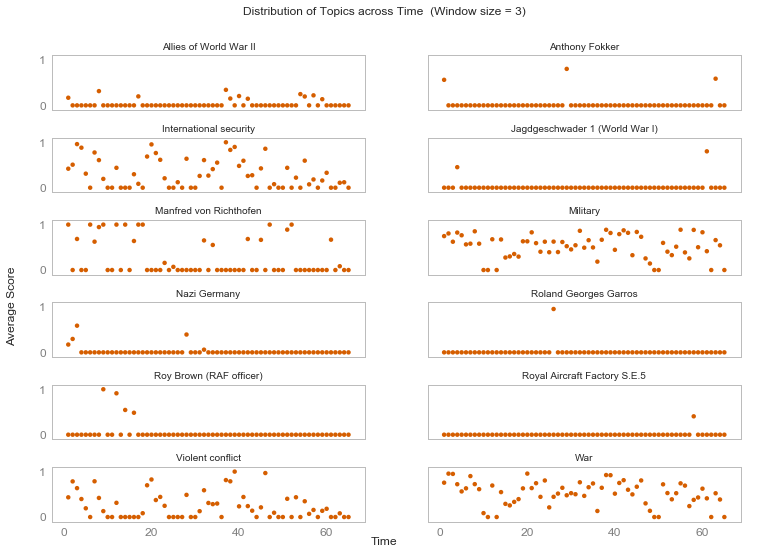

In [54]:
%matplotlib inline
style.use('fivethirtyeight')
#p = ggplot(aes(x='Segment #', y='Average Score'), data=df_new_Array)  +\
p = ggplot(aes(x='Time', y='Average Score'), data=df_new_Array)  +\
geom_point(color = "#D55E00")  +\
facet_wrap('Topic', ncol = 2, nrow =6) +\
ggtitle("Distribution of Topics across Time  (Window size = "+ str(winsize) + ")") +\
theme_bw() +\
theme(axis_title_x  = element_text(vjust = -0.02)) +\
theme(axis_title_y  = element_text(hjust = -0.02))#  +\
#theme(axis_text_x  = element_text(size=12,margin =0.2))+\
#theme(axis_text_y  = element_text( size=12,margin =5,hjust = 0.2, vjust = 0.2))

#theme(axis_title_x  = element_text(vjust = -0.02, size=15)) +\
#theme(plot_margin=dict(bottom=0.2, left=0.2))+\
#theme(title = element_text(size=10))+\
#geom_line(stat="smooth",color='#D55E00') + \
#geom_point(color = "#D55E00")  +\

p.save('facetsvgv' + str(winsize)+'.svg', dpi=1200)
#p.save('facetpdfv' + str(i)+'.pdf')
i+=1
print("Saved ggplot")

In [55]:
#Save hardmax plot
df_new_max = dfmax
df_new_max["id"] = df_new_max.index
df_new_max = pd.melt(df_new_max, id_vars='id', value_vars=range(1,len(df_new_max.columns)))
#Add this line to filter out 0 values
df_filter = df_new_max.loc[df_new_max['value'] != 0]
#df_filter = df_new_max

#plt.figure(figsize=(35,10))
#sns.set(font_scale = 2)
ylabel = list(df_filter.groupby("id").sum().sort_values('value').index.values)
#df_filter.rename(columns={'id': 'Topic', 'variable': 'Segment #', 'value': 'Avg_Score'}, inplace=True)
df_filter.rename(columns={'id': 'Topic', 'variable': 'Time', 'value': 'Avg_Score'}, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


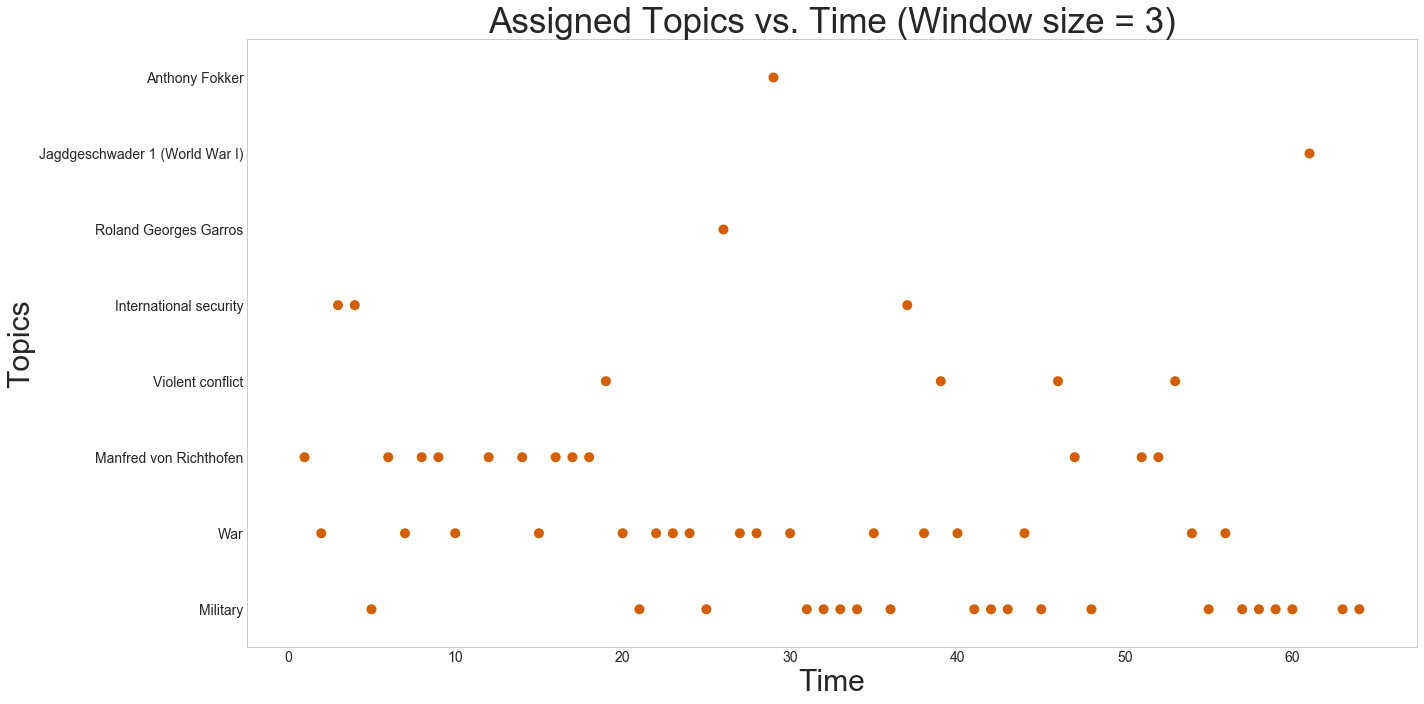

Saved hardmaxplot


In [56]:
j=1
sns.set_style("whitegrid", {'axes.grid' : False})
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.style as style
plt.figure(figsize=(20,10))

#sns.set(font_scale = 2)
#strip_plot = sns.stripplot(x='Segment #' , y = 'Topic', data=df_filter,order=ylabel,size = 10, color = '#D55E00').set_title("Segments vs. Assigned Topics (Window size = 5)",fontsize=35)#.axes.set_xlabel("Sentence",fontsize=30)
strip_plot = sns.stripplot(x='Time' , y = 'Topic', data=df_filter,order=ylabel,size = 10, color = '#D55E00').set_title("Assigned Topics vs. Time (Window size = "+str(winsize)+")",fontsize=35)#.axes.set_xlabel("Sentence",fontsize=30)
#strip_plot.axes.set_title("Title",fontsize=50)
#strip_plot.axes.set_xlabel("Segment #",fontsize=30)
strip_plot.axes.set_xlabel("Time",fontsize=30)
strip_plot.axes.set_ylabel("Topics",fontsize=30)
#strip_plot.axes.set_yticklabels(["Air forces","Roy Brown\n(RAF officer)","Imperial German\nArmy Air Service", "Jagdstaffel", "Military"], va ='center' )#,rotation = 50
#strip_plot.axes.set_axes_locator([1,2,3,4,5])
fig = strip_plot.get_figure()

plt.tight_layout()
#plt.xlabel('Sentence')
#plt.ylabel('Topics')
fig.savefig('HardMaxsvgv'+str(winsize)+'.svg', dpi=1200)
#fig.savefig('HardMaxv'+str(j)+'.pdf')
j+=1
plt.show()
print("Saved hardmaxplot")

#### Trial plotting smooth line graph

In [62]:
from statsmodels.stats.outliers_influence import summary_table
from ggplot.stats.stat_function import stat_function # added line

%matplotlib inline
#style.use('fivethirtyeight')
p = ggplot(aes(x='Segment #', y='Average Score'), data=df_new_Array[df_new_Array['Average Score']>0])  +\
geom_line(color='#D55E00') + \
stat_function(fun= "loess", formula = y ~ x, size = 1) + \
facet_wrap('Topic', ncol = 2, nrow =3) +\
ggtitle("Distribution of Topics across Segments  (Window size = 5)") +\
theme_bw() +\
theme(axis_title_x  = element_text(vjust = -0.02)) +\
theme(axis_title_y  = element_text(hjust = -0.02))


#geom_point(color = "#D55E00")  +\
p.show()
#p.save('facetsvgv' + str(3)+'.svg', dpi=1200)
#p.save('facetpdfv' + str(i)+'.pdf')
#i+=1
print("Saved ggplot")

ModuleNotFoundError: No module named 'ggplot.stats.stat_function'

In [42]:
df_new_Array[df_new_Array['Average Score']>0]

,Topic,Segment #,Average Score
0,Jagdstaffel,1,0.808220
1,Air forces,1,0.543500
3,Military,1,0.833581
4,Imperial German Army Air Service,1,0.599400
6,Jagdstaffel,2,1.000000
9,Military,2,0.873571
12,Jagdstaffel,3,0.780286
13,Air forces,3,0.880300
15,Military,3,0.813959
18,Jagdstaffel,4,0.864100


In [36]:
j=1

In [96]:
grid = sns.FacetGrid(df_new_Array, col="Topic", col_wrap=2)
grid.map(plt.scatter,'Sentence','Average Score')
grid.savefig("facetpdfSNS.pdf")

In [81]:
t = theme_gray()
print(t.get_rcParams().keys())
t.get_rcParams().values()


dict_keys(['timezone', 'lines.linewidth', 'lines.antialiased', 'patch.linewidth', 'patch.facecolor', 'patch.edgecolor', 'patch.antialiased', 'font.family', 'font.size', 'font.serif', 'font.sans-serif', 'axes.facecolor', 'axes.edgecolor', 'axes.linewidth', 'axes.grid', 'axes.titlesize', 'axes.labelsize', 'axes.labelcolor', 'axes.axisbelow', 'axes.prop_cycle', 'grid.color', 'grid.linewidth', 'grid.linestyle', 'xtick.major.size', 'xtick.minor.size', 'xtick.major.pad', 'xtick.minor.pad', 'xtick.color', 'xtick.direction', 'ytick.major.size', 'ytick.minor.size', 'ytick.major.pad', 'ytick.minor.pad', 'ytick.color', 'ytick.direction', 'legend.fancybox', 'figure.figsize', 'figure.facecolor', 'figure.edgecolor', 'figure.subplot.hspace', 'xtick.labelsize', 'ytick.labelsize', 'legend'])


dict_values(['UTC', '1.0', 'True', '0.5', '348ABD', '#E5E5E5', 'True', 'sans-serif', '12.0', ['Times', 'Palatino', 'New Century Schoolbook', 'Bookman', 'Computer Modern Roman', 'Times New Roman'], ['Helvetica', 'Avant Garde', 'Computer Modern Sans serif', 'Arial'], '#E5E5E5', 'bcbcbc', '1', 'True', 'x-large', 'large', 'black', 'True', cycler('color', ['#333333', '#348ABD', '#7A68A6', '#A60628', '#467821', '#CF4457', '#188487', '#E24A33']), 'white', '1.4', 'solid', '0', '0', '6', '6', '#7F7F7F', 'out', '0', '0', '6', '6', '#7F7F7F', 'out', 'True', '11, 8', '1.0', '0.50', '0.5', 10, 10, 'False'])

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from ggplot import *

for i in range(1,11):
    print (i)
    
    my_df_array = buildArray("textFile1", phraseDict, i)
    dfmax = hardMax(my_df_array)

    df_new_Array = my_df_array
    df_new_Array["id"] = df_new_Array.index
    df_new_Array = pd.melt(df_new_Array, id_vars='id', value_vars=range(1,len(df_new_Array.columns)))
    df_new_Array.rename(columns={'id': 'Topic', 'variable': 'Sentence', 'value': 'Avg_Score'}, inplace=True)
    p = ggplot(aes(x='Sentence', y='Avg_Score', color='Topic'), data=df_new_Array)  + geom_point()  +  facet_wrap("Topic") +\
ggtitle("Plot: Occurrence of each topic - windowsize "+str(i)) 
    t = theme_gray()
    t._rcParams['font.size'] = 20 # Legend font size
    t._rcParams['xtick.labelsize'] = 20 # xaxis tick label size
    t._rcParams['ytick.labelsize'] = 20 # yaxis tick label size
    t._rcParams['axes.labelsize'] = 10  # axis label size
    t._rcParams['axes.titlesize'] = 40  # axis label size
    p + t
    p.save("Facet"+str(i)+".png" ,height=10,width=27)
    print("Saved ggplot")


    #Save hardmax plot
    df_new_max = dfmax
    df_new_max["id"] = df_new_max.index
    df_new_max = pd.melt(df_new_max, id_vars='id', value_vars=range(1,len(df_new_max.columns)))
    df_filter = df_new_max.loc[df_new_max['value'] != 0]

    plt.figure(figsize=(35,10))
    sns.set(font_scale = 2)
    ylabel = list(df_filter.groupby("id").sum().sort_values('value').index.values)
    df_filter.rename(columns={'id': 'Topic', 'variable': 'Sentence', 'value': 'Avg_Score'}, inplace=True)
    strip_plot = sns.stripplot(x='Sentence' , y = 'Topic', data=df_filter,order=ylabel,size = 10, color = 'green').set_title("Topics plot: windowsize "+str(i))
    fig = strip_plot.get_figure()
    plt.xlabel('Sentence')
    #plt.ylabel('Topics')

    fig.savefig('HardMax'+str(i)+'.png')

    #plt.show()
    print("Saved hardmaxplot")


1
i =  0
0 ['\ufeffNARRATOR: April 20th, 1918: In the skies over northern France, Allied and German fighter aircraft are locked in a ferocious dogfight.']
  Aviation 1
  Military aviation 1
  Aerial warfare 1
  Military forces 1
  Warfare 1
  Aerial operations and battles 1
  Military 0.9683
  War 0.9415
  Military operations 0.8777
  Military science 0.8318
  Battles 0.815
  Aircraft 0.7999
  Conflicts 0.7858
  Wars 0.7852
  Combat 0.7324
  Fighter aircraft 0.6478
  Violent conflict 0.6233
  Aeronautics 0.6191
  International security 0.6103
  Air-to-air combat operations and battles 0.5816
  Military aircraft 0.5787
  National security 0.511
Phrase Number = 0
['Oswald Boelcke', 'Jagdstaffel', 'Jagdgeschwader 1 (World War I)', 'Dogfight', 'Bloody April', 'Synchronization gear', 'Aviation', 'World War I', 'Sopwith Camel', 'Fokker Dr.I', 'Max Immelmann', 'Anthony Fokker', 'Jagdstaffel 2', 'Cavalry', 'National security', 'Triplane', 'Aerial warfare', 'Jagdstaffel 11', 'Conflicts', 'Recon

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


1
  Air force personnel 1
  World War I flying aces 1
  Air forces 1
  Recipients of the Silver Imtiyaz Medal 1
  German flying aces 1
  Recipients of the Order of the Red Eagle, 3rd class 1
  Aviators 1
  Imperial German Army Air Service 1
  Knights 1st Class of the Saxe-Ernestine House Order 1
  Aces 1
  Recipients of the Silver Liakat Medal 1
  Military aviators 1
  Military 1
  Luftstreitkräfte personnel 1
  Recipients of the Order of Bravery, 4th class 1
  Aviation 1
  German World War I pilots 1
  Flying aces 1
  German World War I flying aces 1
  Military aviation 1
  Richthofen family 1
  Manfred von Richthofen 1
  German casualties of World War I 0.9802
  Aviators killed 0.9539
  Victims of aircraft shootdowns 0.9294
  Recipients of the Hanseatic Cross (Lübeck) 0.9065
  Military of Germany 0.9003
  Barons of Germany 0.865
  War 0.8622
  Shot-down aviators 0.8602
  People associated with war 0.8365
  World War I pilots 0.805
  Recipients of the Pour le Mérite (military class) 0

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4310: FutureWarning: in the future negative indices will not be ignored by `numpy.delete`.
  "`numpy.delete`.", FutureWarning)


Phrase Number = 2
['No. 209 Squadron RAF']
val = 0
row = 2 sentence_num = 5
Phrase Number = 3
['Manfred von Richthofen', 'Fighter aircraft', 'Luftstreitkräfte', 'Cedric Popkin', 'Flying ace', 'Military', 'Military science', 'Military forces', 'Warfare', 'Military aviation', 'War', 'Aeronautics', 'Trench warfare', 'Aircraft', 'International security', 'Sopwith Aviation Company', 'Lanoe Hawker', 'Airplane', 'Aerospace engineering', 'Combat', 'Royal Flying Corps', 'Military organization', 'Violent conflict', 'Military operations']
val = 0
row = 3 sentence_num = 5
Phrase Number = 4
['Imperial German Army Air Service']
val = 0
row = 4 sentence_num = 5
Phrase Number = 5
['Roy Brown (RAF officer)']
val = 0
row = 5 sentence_num = 5
i =  5
5 ['Below, the Germans are engaged in a final, massive offensive to end the First World War.']
  Wars 0.9695
  World Wars 0.8618
  World War I 0.853
  Foreign relations of Germany 0.8256
  War 0.8132
  Military of Germany 0.7824
  Warfare of the Industrial er

val = 0
row = 0 sentence_num = 10
Phrase Number = 1
['Air forces', 'Air force', 'Royal Air Force']
val = 0
row = 1 sentence_num = 10
Phrase Number = 2
['No. 209 Squadron RAF']
val = 0
row = 2 sentence_num = 10
Phrase Number = 3
['Manfred von Richthofen', 'Fighter aircraft', 'Luftstreitkräfte', 'Cedric Popkin', 'Flying ace', 'Military', 'Military science', 'Military forces', 'Warfare', 'Military aviation', 'War', 'Aeronautics', 'Trench warfare', 'Aircraft', 'International security', 'Sopwith Aviation Company', 'Lanoe Hawker', 'Airplane', 'Aerospace engineering', 'Combat', 'Royal Flying Corps', 'Military organization', 'Violent conflict', 'Military operations']
val = 0
row = 3 sentence_num = 10
Phrase Number = 4
['Imperial German Army Air Service']
val = 0
row = 4 sentence_num = 10
Phrase Number = 5
['Roy Brown (RAF officer)']
val = 0
row = 5 sentence_num = 10
i =  10
10 ['This vital intelligence can only be gathered properly from the air.']
Phrase Number = 0
['Oswald Boelcke', 'Jagdstaf

Phrase Number = 0
['Oswald Boelcke', 'Jagdstaffel', 'Jagdgeschwader 1 (World War I)', 'Dogfight', 'Bloody April', 'Synchronization gear', 'Aviation', 'World War I', 'Sopwith Camel', 'Fokker Dr.I', 'Max Immelmann', 'Anthony Fokker', 'Jagdstaffel 2', 'Cavalry', 'National security', 'Triplane', 'Aerial warfare', 'Jagdstaffel 11', 'Conflicts', 'Reconnaissance']
val = 0
row = 0 sentence_num = 15
Phrase Number = 1
['Air forces', 'Air force', 'Royal Air Force']
val = 0
row = 1 sentence_num = 15
Phrase Number = 2
['No. 209 Squadron RAF']
val = 0
row = 2 sentence_num = 15
Phrase Number = 3
['Manfred von Richthofen', 'Fighter aircraft', 'Luftstreitkräfte', 'Cedric Popkin', 'Flying ace', 'Military', 'Military science', 'Military forces', 'Warfare', 'Military aviation', 'War', 'Aeronautics', 'Trench warfare', 'Aircraft', 'International security', 'Sopwith Aviation Company', 'Lanoe Hawker', 'Airplane', 'Aerospace engineering', 'Combat', 'Royal Flying Corps', 'Military organization', 'Violent confli

KeyboardInterrupt: 

In [322]:
df_filter.groupby("id").sum().sort_values('value', ascending=False)

,value
id,
Military,47
Jagdstaffel,45
Imperial German Army Air Service,18
Air forces,7
No. 209 Squadron RAF,1
Roy Brown (RAF officer),1


In [333]:
list(df_filter.groupby("id").sum().sort_values('value', ascending=False).index.values)

['Military',
 'Jagdstaffel',
 'Imperial German Army Air Service',
 'Air forces',
 'No. 209 Squadron RAF',
 'Roy Brown (RAF officer)']

#### Plotting with matplotlib instead of seaborn

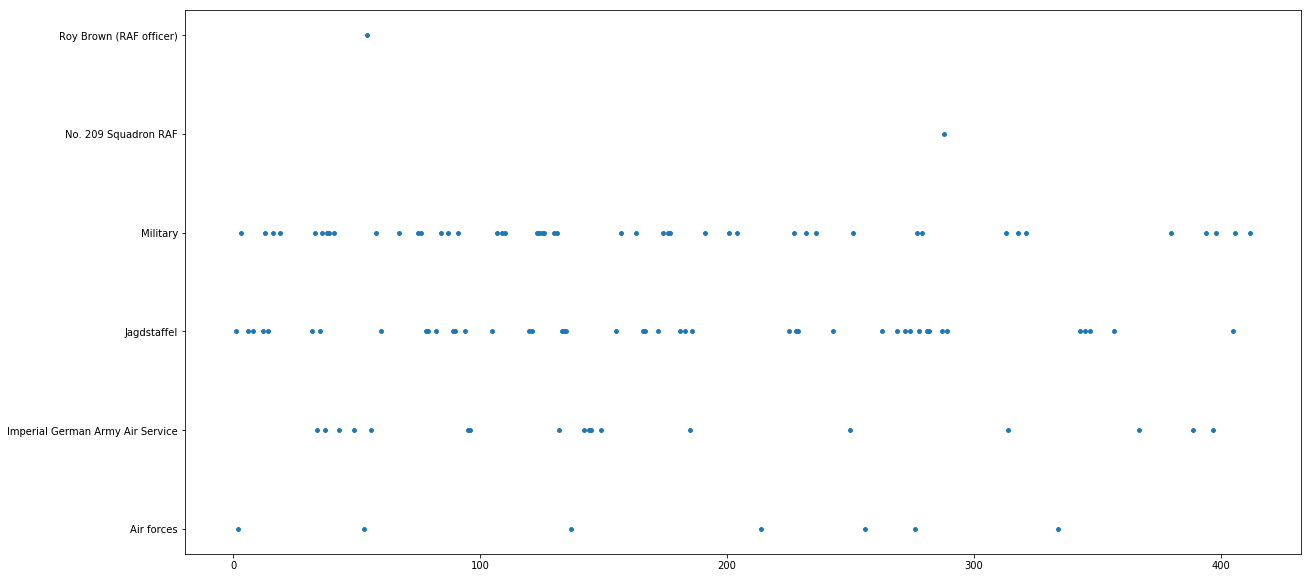

In [382]:
df_filter = df_new_max.loc[df_new_max['value'] != 0]
#ggplot(aes(x='variable', y='id', color='id'), data=df_new_max.loc[df_new_max['value'] != 0])  + geom_line()
import matplotlib.pyplot as plot
#fig, ax = plot.subplots()
#colordict =
#df_new.plot(x="variable", y = "value", c = "C0",)
plot.figure(figsize=(20,10))

ylabel = list(df_filter.groupby("id").sum().sort_values('value', ascending=False).index.values)
#plot.yticks(range(len(ylabel)), ylabel, horizontalalignment='right', weight='bold', size='large')
#plot.set_yticklabels(ylabel)
#plot.xticks(x, my_xticks)
#plot.yticks(ylabel)

#ax.set_yticklabels(ylabel)
plot.scatter(df_filter.variable, df_filter.id,alpha = 1, s = 15)

plot.show()

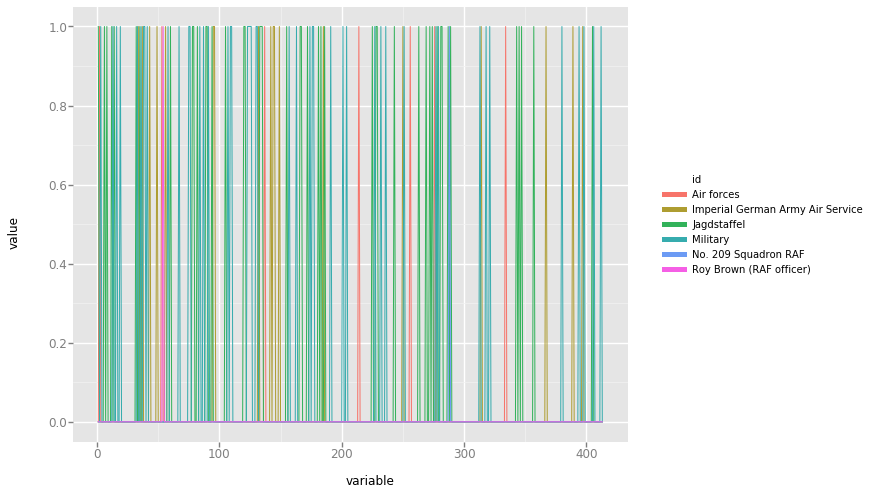

<ggplot: (137900500551)>

In [260]:
ggplot(aes(x='variable', y='value', color='id'), data=df_new_max)  + geom_hist()

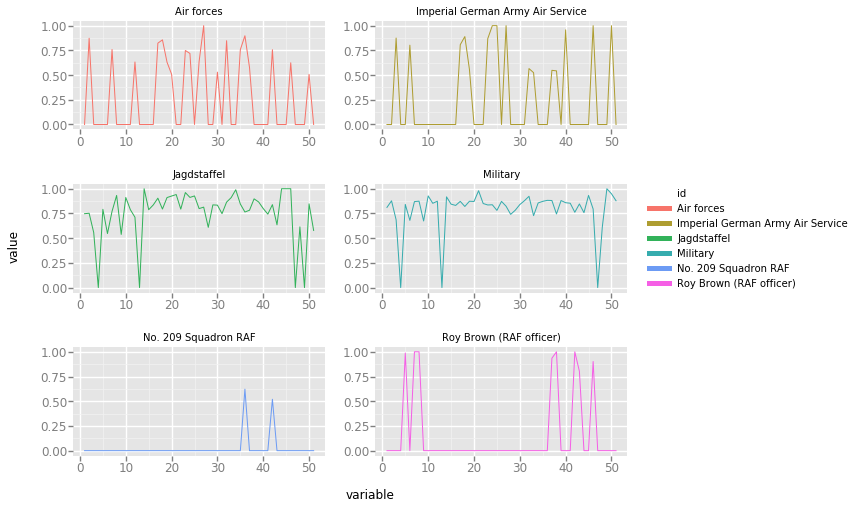

<ggplot: (137899289864)>

In [167]:
ggplot(aes(x='variable', y='value', color='id'), data=df_new)  + geom_line()  +  facet_wrap("id")